## Fase de importación

In [1]:
import pandas as pd
import re
import numpy as np


In [2]:
#importacion a traves de enlace de slack

df= pd.read_csv('data/GSAF5.csv', encoding='latin-1')

## Fase de exploración de columnas o observaciones

In [3]:
#obtenemos una muestra
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [4]:
#intentamos obtener más información de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case Number             5992 non-null   object
 1   Date                    5992 non-null   object
 2   Year                    5992 non-null   int64 
 3   Type                    5992 non-null   object
 4   Country                 5949 non-null   object
 5   Area                    5590 non-null   object
 6   Location                5496 non-null   object
 7   Activity                5465 non-null   object
 8   Name                    5792 non-null   object
 9   Sex                     5425 non-null   object
 10  Age                     3311 non-null   object
 11  Injury                  5965 non-null   object
 12  Fatal (Y/N)             5973 non-null   object
 13  Time                    2779 non-null   object
 14  Species                 3058 non-null   object
 15  Inve

In [5]:
#intetar averiguar porque hay dos columnas con 'Case Nº 1' y 'Case Nº 2'
df[df['Case Number']=='2016.09.15']
#viendo un ejemplo se comprueba que las columnas son irrelevantes

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [6]:
#intentamos averiguar que hay en los campos con enlaces
print(df.at[4,"href formula"])
print(df.at[4,"href"])
#parece que son la ruta del pdf del expediente del caso registrado (se duplica)

http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.16-BellsBeach.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.16-BellsBeach.pdf


In [7]:
#comprobamos que hay en Time
print(df.at[10,"Time"])

Late afternoon


## Fase limpieza

### Eliminar columnas y filas innecesarias

In [8]:
#eliminamos las columnas irrelevantes
df.drop(["href formula",'Unnamed: 22', 'Unnamed: 23','Case Number.1', 'Case Number.2','pdf'],axis=1,inplace=True)

In [9]:
'''en comparación con el número de filas (5992) hay demasiado valores nulos en las columnas ['Age','Time','Species'] 
y, por tanto, decido que es mejor eliminarlas'''
df.drop(['Age','Time','Species '],axis=1,inplace=True)
df.isna().sum()

Case Number                 0
Date                        0
Year                        0
Type                        0
Country                    43
Area                      402
Location                  496
Activity                  527
Name                      200
Sex                       567
Injury                     27
Fatal (Y/N)                19
Investigator or Source     15
href                        3
original order              0
dtype: int64

### Eliminar valores nulos

In [10]:
#comprobamos missing values de cada columna
df.isna().sum()


Case Number                 0
Date                        0
Year                        0
Type                        0
Country                    43
Area                      402
Location                  496
Activity                  527
Name                      200
Sex                       567
Injury                     27
Fatal (Y/N)                19
Investigator or Source     15
href                        3
original order              0
dtype: int64

In [11]:
#renombrar href por "path pdf"
df.rename(columns={'href':'pdf_path'},inplace=True)

In [12]:
#averiguar los pdf vacios
df[df['pdf_path'].isnull()]

# eliminarlos por no ser comprobables
df.drop(df[df['pdf_path'].isnull()].index,inplace=True)

In [13]:
#Creamos un dataframe con los campos 'Fatal (Y/N)' vacíos y que en el campo 'injury' indique que haya sido un accidente mortal
fatal_injury_and_null = df[df['Fatal (Y/N)'].isnull() & df['Injury'].str.contains('FATAL|remains|[Dd]eath', regex=True)==True]

#informamos del valor correcto en 'Fatal (Y/N)'
fatal_injury_and_null.loc[:,'Fatal (Y/N)']='Y'

#eliminamos los registros antiguos del df original y añadimos los registros actualizados
df.drop(df[df['Fatal (Y/N)'].isnull() & df['Injury'].str.contains('FATAL|remains|[Dd]eath', regex=True)==True].index,inplace=True)
df=pd.concat([df, fatal_injury_and_null],axis=0)


#informamos a los demás registros con campos 'Fatal (Y/N)' vacíos como accidente NO mortal
df.loc[df['Fatal (Y/N)'].isnull(),'Fatal (Y/N)']='N'


C:\Users\carlo\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [14]:
#examinamos lista de países
Countries=df['Country'].unique()

#examinamos los países que están vacios y informamos aquellos que veamos que se puede deducir el país a partir de 'Area'
#1) creo un df con los registros de país vacíos
df3=df[df['Country'].isnull()]

#2) Hago las modificaciones en el nuevo df
df3['Area']=df3['Area'].str.replace('(Between)|(Near the)|(Darwin, )|(300 miles east of St. Thomas )','',regex=True)
df3['Area']=df3['Area'].str.replace('&','/')
df3['Area']=df3['Area'].str.replace(r"\(","")
df3['Area']=df3['Area'].str.replace(r"\)","")
df3['Area']=df3['Area'].str.replace('(French Southern Territories)','FRANCE',regex=True)
df3['Area']=df3['Area'].str.replace('(English Channel)','ATLANTIC OCEAN',regex=True)
df3['Area']=df3['Area'].str.replace('(Ionian Sea)','MEDITERRANEAN SEA',regex=True)
df3['Area']=df3['Area'].str.replace('(Off South American coast)|(Western Banks)','Unkown',regex=True)

df3['Area']=df3['Area'].str.strip()
df3['Area']=df3['Area'].str.upper()
df3['Area'].fillna('UNKOWN', inplace=True)

df3.loc[df['Country'].isnull(),'Country']=df3['Area']

#eliminamos los registros antiguos del df original y añadimos los registros actualizados
df.drop(df[df['Country'].isnull()].index,inplace=True)
df=pd.concat([df, df3],axis=0)
df

<ipython-input-14-19a0f455ba2f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Area']=df3['Area'].str.replace('(Between)|(Near the)|(Darwin, )|(300 miles east of St. Thomas )','',regex=True)
<ipython-input-14-19a0f455ba2f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Area']=df3['Area'].str.replace('&','/')
<ipython-input-14-19a0f455ba2f>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df3['Area']=df3['Area'].str.replace(r"\(","")
<ipython-

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Injury,Fatal (Y/N),Investigator or Source,pdf_path,original order
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,Minor injury to thigh,N,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,5993
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,Lacerations to hands,N,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,5992
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,Lacerations to lower leg,N,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,5991
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,Struck by fin on chest & leg,N,"The Age, 9/18/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,5990
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,No injury: Knocked off board by shark,N,"The Age, 9/16/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,5989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5866,0077.00.00,77 A.D.,77,Unprovoked,MEDITERRANEAN SEA,MEDITERRANEAN SEA,NaN,Sponge diving,males,M,FATAL,Y,Perils mentioned by Pliny the Elder (23 A.D. t...,http://sharkattackfile.net/spreadsheets/pdf_di...,127
5868,0.0214,Ca. 214 B.C.,0,Unprovoked,MEDITERRANEAN SEA,MEDITERRANEAN SEA,NaN,Ascending from a dive,"Tharsys, a sponge diver",M,"FATAL, shark/s bit him in two",Y,"Reported by Greek poet, Leonidas of Tarentum (...",http://sharkattackfile.net/spreadsheets/pdf_di...,125
5889,ND-0124,Before 2011,0,Provoked,UNKOWN,UNKOWN,NaN,NaN,Phillip Peters,M,Bitten by captive sharks PROVOKED INCIDENTS,N,"Watertown Daily Times, 7/8/2011",http://sharkattackfile.net/spreadsheets/pdf_di...,104
5896,nd-0114,Before 2012,0,Unprovoked,UNKOWN,UNKOWN,In a river feeding into the Bay of Bengal,Netting shrimp,Sametra Mestri,F,Hand severed,N,National Georgraphic Television,http://sharkattackfile.net/spreadsheets/pdf_di...,97


In [15]:
df['Sex '].unique()
df.loc[df['Sex '].str.contains('M ', case=False, na=False), 'Sex '] = 'M'
df.loc[~df['Sex '].str.contains('M|F',regex=True,na=False),'Sex ']='UNKOWN'


df4 = df[df['Sex ']=='UNKOWN']
df4.loc[df4['Name'].str.contains('(male)|(m[ea]n)',case=False, na=False, regex=True),'Sex '] = 'M'
df4.loc[df4['Name'].str.contains('(female)|(wom[ea]n)',case=False, na=False, regex=True),'Sex '] = 'F'

df.drop(df[df['Sex ']=='UNKOWN'].index,inplace=True)
df=pd.concat([df, df4],axis=0)

print(df['Sex '].value_counts())

M         4883
F          587
UNKOWN     519
Name: Sex , dtype: int64


C:\Users\carlo\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\carlo\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [16]:
#subtituimos valores nulos por 'Unknown'
df['Injury'].fillna('Unknown', inplace=True)
df['Investigator or Source'].fillna('Unknown', inplace=True)

In [17]:
#substituir nombre vacios por John Doe & Jane Doe
df5=df[df['Name'].isnull()]
df5.loc[df5['Sex ']=='M','Name']="John Doe"
df5.loc[df5['Sex ']=='F','Name']="Jane Doe"
df5.loc[df5['Sex ']=='UNKOWN','Name']="Unkown"

df.drop(df[df['Name'].isnull()].index,inplace=True)
df=pd.concat([df, df5],axis=0)

#reemplazar nombres de male o female por John/Jane Doe
df["Name"].replace({"male": "John Doe", "female": "Jane Doe", "Male": "John Doe"}, inplace=True)


In [18]:
#arreglar valores nulos de area a partir de información de 'Location' y, sinó, de 'Country'
df6=df[df['Area'].isnull()]

#itinerar para sacar las areas donde location es una area en otro registro
list_areas=df['Area'].unique()
for c in df6.columns:
    if c!='Location':
        pass
    else:
        for i in df6.index:
            if df6.at[i,c] in list_areas:
                df6.at[i,'Area']=df6.at[i,c]
            else:
                pass

#itinerar para sacar las areas donde location es un Country en otro registro            
country_list=[x.title() for x in Countries.tolist() if isinstance(x, str)]
for c in df6.columns:
    if c!='Location':
        pass
    else:
        for i in df6.index:
            if df6.at[i,c] in country_list:
                df6.at[i,'Area']=df6.at[i,c]
            else:
                pass

#substituir las areas vacias con location informada por "Una área de..."            
df6.loc[df6['Location'].notnull(),'Area']=("The area of "+df6['Location']) 

#Substituir el resto de valores nulos por "Unkown area"
df6['Area'].fillna('Unknown area', inplace=True)

df.drop(df[df['Area'].isnull()].index,inplace=True)
df=pd.concat([df, df6],axis=0)

C:\Users\carlo\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\carlo\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [19]:
#Substituimos directamente los valores nulos por "Unkown location" ya que no podemos estimar la localización con la información dada
df['Location'].fillna('Unknown location', inplace=True)

In [20]:
df['Activity'].apply(type)
df['Activity'] = df['Activity'].astype(str)


<AxesSubplot:>

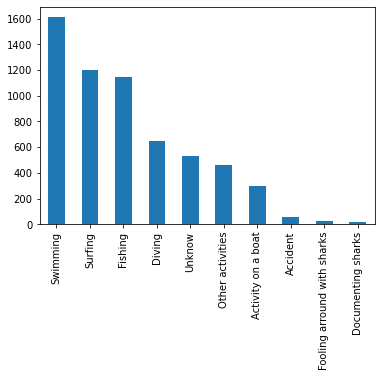

In [21]:
#Substituimos los valores nulos de activity por "Unkown activity"
df['Activity'].fillna('Unknown activity', inplace=True)

#convertimos todos los valores a texto:
df['Activity'] = df['Activity'].astype(str)

#miramos las actividades más recurentes
df.groupby('Activity', sort=False)['Case Number'].count().nlargest(30)
df['Activity_type']=""
'''for i in df.index:
    stringx=df.at[i,'Activity']
    if not re.search("([Ss]urf)|[Bb]oarding", stringx):
        pass
    else:
        df.at[i,'Activity_type']=='Surfing' '''

#las agrupamos en categorias

surf=re.compile('([Ss]urfing)|([Bb]oarding)|([Pp]addle)')
dive=re.compile('([Dd]iving)|([Ss]norkeling)')
fish=re.compile('([Ff]ish)|([Hh]unt)|([Tt]rap)|([Aa]quarium)|([Pp]ull)|([Pp]ick)|([Ll]obster)')
boat=re.compile('([Cc]anoe)|([Oo]verboard)|([Kk]ayak)|([Rr]owing)|([Bb]oat)|([Ss]ail)')
swim=re.compile('([Ss]wim)|([Ss]tand)|([Bb]ath)|([Tt]reading)|([Ww]alk)|([Ww]ading)|([Ff]loat)|([Ss]itting)|([iI]n the water)|([Jj]ump)|([Ss]plash)')
unkown=re.compile('([Uu]nknown)|(nan)')
fooling=re.compile('([Tt]easing)|([Pp]laying)|([Pp]rovok)|([Hh]and feed)|([Pp]etting)')
docum=re.compile('([Pp]hoto)|([Ff]ilm)|[Tt]agging')
accident=re.compile('([Dd]isaster)|([Ww]reck)')
        
def group_activity(act):
    s=surf.search(act)
    d=dive.search(act)
    f=fish.search(act)
    b=boat.search(act)
    sw=swim.search(act)
    u=unkown.search(act)
    fo=fooling.search(act)
    dc=docum.search(act)
    ac=accident.search(act)
    if s:
        return "Surfing"
    elif d:
        return "Diving"
    elif f:
        return "Fishing"
    elif b:
        return "Activity on a boat"
    elif sw:
        return "Swimming"
    elif u:
        return "Unknow"
    elif fo:
        return "Fooling arround with sharks"
    elif dc:
        return "Documenting sharks"
    elif ac:
        return "Accident"
    else:
        return "Other activities"
    
df['Activity_type']=df['Activity'].apply(lambda x: group_activity(x))

#comprobamos las agrupaciones

df['Activity_type'].value_counts().plot(kind='bar')



In [22]:
df[df['Activity_type']=='Unknow']

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Injury,Fatal (Y/N),Investigator or Source,pdf_path,original order,Activity_type
31,2016.07.16.a,16-Jul-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",nan,Jane Doe,F,Minor injury to toes,N,"Orlando Sentinel, 7/21/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,5962,Unknow
40,2016.06.27,27-Jun-16,2016,Unprovoked,USA,South Carolina,Sullivan's Island,nan,John Doe,M,Minor injury,N,"C. Creswell, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,5953,Unknow
73,2016.04.08,08-Apr-16,2016,Invalid,CAPE VERDE,Boa Vista Island,Unknown location,nan,a British citizen,M,"""Serious""",N,L.O.Guttke,http://sharkattackfile.net/spreadsheets/pdf_di...,5920,Unknow
78,2016.03.28.b,28-Mar-16,2016,Unprovoked,USA,Florida,"Fort Myers Beach, Lee County",nan,Nick Kawa,M,Minor injury to arm. Possibly caused by smalll...,N,"Fox 35, 3/30/2015",http://sharkattackfile.net/spreadsheets/pdf_di...,5915,Unknow
84,2016.03.04,04-Mar-16,2016,Unprovoked,USA,Florida,"Ocean Reef Park, Singer Island, Palm Beach County",nan,John Doe,M,Superficial injury to foot,N,WPTV. 3/4/2016,http://sharkattackfile.net/spreadsheets/pdf_di...,5909,Unknow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,2002.06.16,16-Jun-02,2002,Invalid,INDONESIA,"The area of Shark caught in Indonesia, offload...","Shark caught in Indonesia, offloaded to trawle...",nan,Unkown,UNKOWN,Human remains (right forearm & leg) recovered ...,Y,espn.go.com,http://sharkattackfile.net/spreadsheets/pdf_di...,4369,Unknow
1971,1998.04.00,Apr-98,1998,Unprovoked,NEW CALEDONIA,The area of Île de Sable,Île de Sable,nan,Unkown,UNKOWN,Calf bitten,N,W. Leander,http://sharkattackfile.net/spreadsheets/pdf_di...,4022,Unknow
4806,1930.09.12.R,1930,1930,Boating,AZORES,Unknown area,Unknown location,nan,Unkown,UNKOWN,"No inury to occupants, shark struck boat",N,"C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,1187,Unknow
5562,1881.00.00.b,1881,1881,Unprovoked,INDIA,"The area of At Panihattu, Barrackpore, Dackhin...","At Panihattu, Barrackpore, Dackhineshwar, Bara...",nan,Unkown,UNKOWN,"""More than 20 persons severely bitten by shark...",Y,"A.C. Kastagir, Asst. Surgeon in the Indian Med...",http://sharkattackfile.net/spreadsheets/pdf_di...,431,Unknow


### Comprobar y arreglar tipos de datos

In [23]:
print(df.dtypes)
print('-'*80)
print(df.iloc[0])

Case Number               object
Date                      object
Year                       int64
Type                      object
Country                   object
Area                      object
Location                  object
Activity                  object
Name                      object
Sex                       object
Injury                    object
Fatal (Y/N)               object
Investigator or Source    object
pdf_path                  object
original order             int64
Activity_type             object
dtype: object
--------------------------------------------------------------------------------
Case Number                                                    2016.09.18.c
Date                                                              18-Sep-16
Year                                                                   2016
Type                                                             Unprovoked
Country                                                                 U

In [24]:
#analizamos columna year
df.groupby('Year').count()
#suponemos que los valores con menos de 4 dígitos son erroneos y le damos valor 0
df.loc[df['Year']<1000, 'Year'] = 0
#de los años vacíos intentamos extraer año de la columna 'Date'
df_y0=df[df['Year']==0]
years=re.compile('\d{4}')
df_y0['year_from_date']=""

def take_year(date):
    y=years.search(date)
    if y:
        return int(y.group())
    else:
        return 0
    
df_y0['year_from_date']=df_y0['Date'].apply(lambda x: take_year(x))

#substituimos el valor vacío de 'Year' por el que hay en 'year_from_date'
df_y0.loc[df_y0['year_from_date']!=0, 'Year'] = df_y0['year_from_date']
#eliminamos columna 'year_from_date'
df_y0=df_y0.drop(columns=['year_from_date'])

#actualizamos columna year en el df original
df.drop(df[df['Year']==0].index,inplace=True)
df=pd.concat([df, df_y0],axis=0)
df.drop(df[df['Year']==0].index,inplace=True)

#volvemos a analizar columna year
df.groupby('Year').count()
df.Year=df.Year.astype(int)
df

<ipython-input-24-b935678676dd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y0['year_from_date']=""
<ipython-input-24-b935678676dd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y0['year_from_date']=df_y0['Date'].apply(lambda x: take_year(x))
C:\Users\carlo\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Injury,Fatal (Y/N),Investigator or Source,pdf_path,original order,Activity_type
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,John Doe,M,Minor injury to thigh,N,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,5993,Surfing
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,Lacerations to hands,N,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,5992,Surfing
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,John Doe,M,Lacerations to lower leg,N,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,5991,Surfing
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,Struck by fin on chest & leg,N,"The Age, 9/18/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,5990,Surfing
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,John Doe,M,No injury: Knocked off board by shark,N,"The Age, 9/16/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,5989,Surfing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5983,ND.0009,Before 1906,1906,Unprovoked,AUSTRALIA,Unknown area,Unknown location,Fishing,boy,M,"FATAL, knocked overboard by tail of shark & ca...",Y,"NY Sun, 9/9/1906, referring to account by Loui...",http://sharkattackfile.net/spreadsheets/pdf_di...,10,Fishing
5984,ND.0008,Before 1906,1906,Unprovoked,AUSTRALIA,Unknown area,Unknown location,Fishing,fisherman,M,FATAL,Y,"NY Sun, 9/9/1906, referring to account by Loui...",http://sharkattackfile.net/spreadsheets/pdf_di...,9,Fishing
5985,ND.0007,Before 1906,1906,Unprovoked,AUSTRALIA,Unknown area,Unknown location,Fishing,fisherman,M,FATAL,Y,"NY Sun, 9/9/1906, referring to account by Loui...",http://sharkattackfile.net/spreadsheets/pdf_di...,8,Fishing
5990,ND.0002,1883-1889,1883,Unprovoked,PANAMA,"The area of Panama Bay 8ºN, 79ºW","Panama Bay 8ºN, 79ºW",nan,Jules Patterson,M,FATAL,Y,"The Sun, 10/20/1938",http://sharkattackfile.net/spreadsheets/pdf_di...,3,Unknow


In [36]:
#examinamos nuevamente los países disponibles en "Country"
Countries
#arreglamos los países que salen con ? o Between... &...
years=re.compile('\d{4}')
df['Country']=df['Country'].str.replace('Between PORTUGAL & INDIA','PORTUGAL / INDIA')
df['Country']=df['Country'].str.replace('?','')
df['Country']=df['Country'].str.replace('&','AND')
df['Country']=df['Country'].str.replace('(St )|([Ss][tT]\.)','SAINT ',case=None,regex=True)
df['Country']=df['Country'].str.replace('CEYLON (SRI LANKA)','SRI LANKA',regex=False)
df['Country']=df['Country'].str.replace('UNITED ARAB EMIRATES (UAE)','UNITED ARAB EMIRATES',regex=False)


#creamos una nueva columna para clasificar mejor los países
df['Country_clean']=df['Country']
df.loc[df['Country_clean'].str.contains('/', regex=False)==True, 'Country_clean'] = 'Between two countries'

#importacion de un listado de países/territorios de enlace de github:
df_world= pd.read_csv('data/world.csv')
#eliminamos los acentos en los nombres de los países
df_world['name']=df_world['name'].str.replace('á','a',regex=False)
df_world['name']=df_world['name'].str.replace('é','e',regex=False)
df_world['name']=df_world['name'].str.replace('í','i',regex=False)
df_world['name']=df_world['name'].str.replace('ó','o',regex=False)
df_world['name']=df_world['name'].str.replace('ú','u',regex=False)
list_world=df_world['name'].str.upper().to_list()
list_acro=df_world['alpha3'].str.upper().to_list()



for i in df.index:
    if df.at[i,'Country_clean'] in list_world:
        pass
    elif df.at[i,'Country_clean'] in list_acro:
        pass
    else:
        df.at[i,'Country_clean']='No country'

#Countries=df['Country_clean'].unique()
#comprobamos los countries que no se relacionan y los reemplazamos 

df.loc[(df['Country']=='ENGLAND') | (df['Country']=='UNITED KINGDOM') | (df['Country']=='SCOTLAND'), 'Country_clean'] = 'UNITED KINGDOM'
df.loc[df['Country']=='IRAN', 'Country_clean'] = df['Country']
df.loc[df['Country']=='VIETNAM', 'Country_clean'] = df['Country']
df.loc[df['Country']=='VENEZUELA', 'Country_clean'] = df['Country']
df.loc[df['Country']=='COLUMBIA', 'Country_clean'] = 'COLOMBIA'
df.loc[df['Country']=='TAIWAN', 'Country_clean'] = df['Country']
df.loc[df['Country']=='SOUTH KOREA', 'Country_clean'] = df['Country']
df.loc[df['Country']=='TANZANIA', 'Country_clean'] = df['Country']
df.loc[df['Country']=='YEMEN ', 'Country_clean'] = df['Country']
df.loc[df['Country']=='OKINAWA', 'Country_clean'] = 'JAPAN'
df.loc[df['Country']=='NEW BRITAIN', 'Country_clean'] = 'NEW GUINEA'
df.loc[df['Country']=='TURKS AND CAICOS', 'Country_clean'] = df['Country']
df.loc[df['Country']=='NEW GUINEA', 'Country_clean'] = df['Country']
df.loc[df['Country']=='AZORES', 'Country_clean'] = 'PORTUGAL'
df.loc[df['Country']=='BURMA', 'Country_clean'] = 'MYANMAR'
df.loc[df['Country']=='RUSSIA', 'Country_clean'] = df['Country']
df.loc[df['Country']=='CAPE VERDE', 'Country_clean'] = df['Country']
df.loc[df['Country']=='EGYPT', 'Country_clean'] = df['Country']

df[df['Country_clean']=='No country'].groupby('Country', sort=False)['Case Number'].count().nlargest(30)

#df_world[df_world['name']=='Réunion']

#df3['Area']=df3['Area'].str.replace('&','/')

<ipython-input-36-dd90e32260df>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Country']=df['Country'].str.replace('?','')


Country
UNKOWN                     32
ATLANTIC OCEAN             17
PACIFIC OCEAN              17
SOUTH ATLANTIC OCEAN       12
CARIBBEAN SEA              10
INDIAN OCEAN                8
NORTH PACIFIC OCEAN         7
MID ATLANTIC OCEAN          5
PERSIAN GULF                4
NORTH ATLANTIC OCEAN        4
MEDITERRANEAN SEA           4
Fiji                        3
 TONGA                      3
MICRONESIA                  3
PACIFIC OCEAN               2
RED SEA                     2
EGYPT                       2
JOHNSTON ISLAND             2
SOUTH PACIFIC OCEAN         2
CENTRAL PACIFIC             2
SOUTHWEST PACIFIC OCEAN     2
CRETE                       2
ANTIGUA                     1
BRITISH VIRGIN ISLANDS      1
Sierra Leone                1
SAINT  MAARTIN              1
GRAND CAYMAN                1
Seychelles                  1
MEXICO                      1
EGYPT / ISRAEL              1
Name: Case Number, dtype: int64

In [26]:
list_world.to_list()

AttributeError: 'list' object has no attribute 'to_list'

In [ ]:
#Where did Fonzie jump de sharK???
years_show=list(range(1955,1970))
results=df[df.Year.isin(years_show)][df.Country=='USA'][df.Activity_type=='Surfing'][df['Sex ']=='M'][df.Area=='California'][df['Fatal (Y/N)']=='N']
fonzie_case=results.nlargest(1,'Year')
print(f'''What happened to Fonzie after jumping the shark? 
The result was as follows: 
{fonzie_case["Injury"]}''')
